# APS TRANSCAL 
##### Caio Tieri, Felipe Trintim, Rafael Coca e Thomas Chabro

___
##   1   (4,0 pontos)



$ \frac {d^2x}{dt^2} - \frac{hP}{kA _{tr}} \cdot (T - T _{\inf}) = \frac{1}{\alpha} \cdot \frac{dT}{dt} $

$ \therefore \frac{T^l _{i + 1} - 2 T^l _{i} + T^l _{i - 1}}{\Delta x^2} - \frac{hP}{k A _{tr}} \cdot (T - T _{inf}) = \frac{T^{l+1} _{i} - T^l _{i}}{\alpha \cdot \Delta t}$

$ \therefore (\frac{T^l _{i + 1} - 2 T^l _{i} + T^l _{i - 1}}{\Delta x^2} - \frac{hP}{k A _{tr}} \cdot (T - T _{inf})) \cdot \alpha \cdot \Delta t + T^l _{i} = T^{l + 1} _{i}$

___
##   2   (4,0 pontos)

imports

In [170]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



funcao

In [171]:
def funcao(density, calor_especifico, k, h, t_fluido, t_base, raio, comprimento, dx, tempo):
    alpha = k/(density*calor_especifico)
    r = raio
    t = tempo
    l = comprimento   
    tinf = t_fluido
    tb = t_base
    atr = pi * r**2
    p = 2 * pi * r
    dt = ((dx**2)/(alpha*((h*p*dx**2)/(k*atr)+ 2))) * 0.9
    print(dt)

    listax = np.arange(0, l+dx, dx)
    listay = np.arange(0, t+dt, dt)

    T = np.zeros((len(listay), len(listax)))

    T[:, 0] = tb
    T[:,-1] = 25+273
    
    tzinho = 0

    for t in range(1, len(listay)-1):
        for x in range(1, len(listax)-1):
            job = (T[t, x+1] - 2*T[t, x] + T[t, x-1]) / dx**2
            eve = ((h*p) / (k*atr)) * (T[t, x] - tinf)
            T[t+1, x] = (job - eve) * alpha * dt + T[t, x]
            if abs(T[t+1, x] - T[t, x]) <= 10**-10:
                tzinho = t
    

    return T, listax, listay, tzinho




In [172]:
tol = 1 * 10**-10
l = 300 * 10**-3
d = 5 * 10**-3
r = d/2
p = 2 * pi * r
density = 2700
k = 180 # W/mK
c = 896
t = 25 + 273
tb = 100 + 273
tinf = 50 + 273
h = 50
alpha = k/(density*c)

temp, posicao, tempo, tzinho = funcao(density=density, calor_especifico=c, k=k, h=h, t_fluido=tinf, t_base=tb, raio=r, comprimento=l, dx=0.01, tempo=1000)


0.5981538461538461


1673


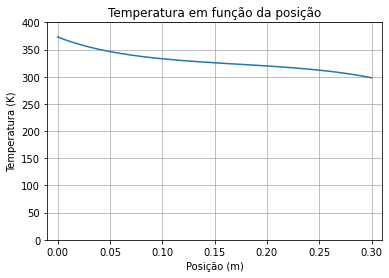

In [176]:
#plota ultimo valor de temp pela posicao
print(len(temp))


plt.plot(posicao, temp[tzinho, :])
plt.axis([-0.01, 0.31, 0, 400])
plt.xlabel('Posição (m)')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura em função da posição')
plt.grid()

plt.show()